In [1]:
import pandas as pd
import glob, os
import matplotlib.pyplot as plt

In [2]:
path = 'TMIN_TMAX_NZ'
file = glob.glob(os.path.join(path,"*.csv"))
nz_df = []
for i in file:
    nz_df.append(pd.read_csv(i,index_col=None))
df=pd.concat(nz_df)

In [3]:
columns = ["ID","NAME","ELEMENT","YEAR","VALUE"]
Temp_NZ = df[columns]

In [4]:
Temp_NZ

,ID,NAME,ELEMENT,YEAR,VALUE
0,NZ000936150,HOKITIKA AERODROME,TMAX,2010,NaN
1,NZM00093110,AUCKLAND AERO AWS,TMAX,2010,NaN
2,NZM00093110,AUCKLAND AERO AWS,TMIN,2010,NaN
3,NZM00093678,KAIKOURA,TMAX,2010,NaN
4,NZM00093678,KAIKOURA,TMIN,2010,NaN
...,...,...,...,...,...
1507,NZM00093439,WELLINGTON AERO AWS,TMAX,2022,186.0
1508,NZM00093678,KAIKOURA,TMAX,2022,172.0
1509,NZM00093781,CHRISTCHURCH INTL,TMAX,2022,194.0
1510,NZM00093929,ENDERBY ISLAND AWS,TMAX,2022,139.0


In [5]:
Temp_NZ.VALUE = Temp_NZ.VALUE / 10


In [6]:
stations = Temp_NZ["NAME"].drop_duplicates().tolist()


In [7]:
stations

['HOKITIKA AERODROME',
 'AUCKLAND AERO AWS',
 'KAIKOURA',
 'GISBORNE AERODROME',
 'CHRISTCHURCH INTL',
 'WELLINGTON AERO AWS',
 'INVERCARGILL AIRPOR',
 'PARAPARAUMU AWS',
 'NEW PLYMOUTH AWS',
 'KAITAIA',
 'CHATHAM ISLANDS AWS',
 'RAOUL ISL/KERMADEC',
 'TARA HILLS',
 'CAMPBELL ISLAND AWS',
 'ENDERBY ISLAND AWS']

In [8]:
len(stations)

15

In [9]:
station_df = pd.pivot_table(Temp_NZ,index='YEAR',columns = 'ELEMENT',values='VALUE')

In [10]:
def plot(i,NAME1):
    station_df = Temp_NZ.loc[Temp_NZ["NAME"] == NAME1]
    station_df = pd.pivot_table(station_df,index='YEAR',columns = 'ELEMENT',values='VALUE')
    ax = fig.add_subplot(5,3,(1+i))
    plt.title(NAME1)
    ax.set_title(NAME1,size = 50)
    ax.plot(station_df.index,station_df['TMIN'],color='blue', label = 'Minimum', linewidth=5)
    ax.plot(station_df.index,station_df['TMAX'],color='red', label = 'Maximum', linewidth=5)  
    ax.set_xlabel('Year', size = 30)
    ax.set_ylabel('Temperature in $^\circ$C', size = 30)
    ax.tick_params(axis='both', which='both', labelsize=25)
    ax.legend(title=("Temperature"))
    plt.xlabel('Year')
    plt.ylabel('Temperature')
    

In [14]:
fig = plt.figure(figsize=(60,60),linewidth=100)

<Figure size 4320x4320 with 0 Axes>

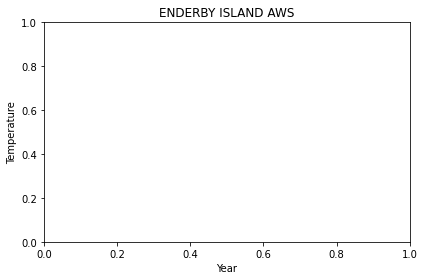

In [15]:
for i,NAME1 in enumerate(stations):
    plot(i,NAME1)  
    plt.tight_layout()    

In [16]:
fig.savefig("stations.png")

In [14]:
Temp_NZ_df = Temp_NZ.pivot_table(index='YEAR', columns='ELEMENT', values ='VALUE')

In [15]:
Temp_NZ_df['TMAX'].max()

21.844955489614243

In [16]:

Temp_NZ_df['TMAX'].min()


15.17377948436643

In [17]:
Temp_NZ_df['TMIN'].max()

14.803678929765887

In [18]:
Temp_NZ_df['TMIN'].min()

7.206195175438597

Text(0.5, 1.0, 'Average Temperature in New Zealand')

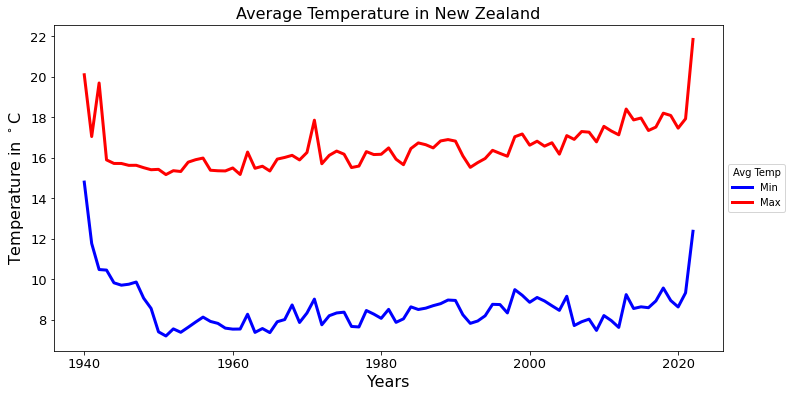

In [24]:
fig1, ax = plt.subplots(figsize=(12, 6))
ax.plot(Temp_NZ_df['TMIN'],color='blue', label = 'Min', linewidth=3)
ax.plot(Temp_NZ_df['TMAX'],color='red', label = 'Max', linewidth=3)
ax.tick_params(axis='both', which='both', labelsize=13)
plt.xlabel('Years', size = 16)
plt.ylabel('Temperature in $^\circ$C', size = 16)
plt.legend(title = "Avg Temp",
           loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Average Temperature in New Zealand', size = 16)

In [25]:
fig1.savefig("Temp_NZ.png")  

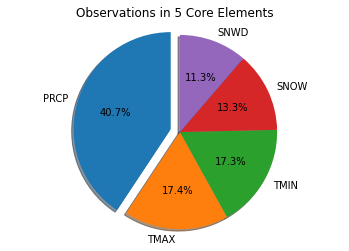

In [18]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'PRCP', 'TMAX', 'TMIN', 'SNOW', 'SNWD'
sizes = [1043785667, 445623712, 444271327, 341985067, 289981374]
explode = (0.1, 0, 0, 0, 0)  

fig3, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Observations in 5 Core Elements')
plt.show()
fig3.savefig("5CoreElements.png")

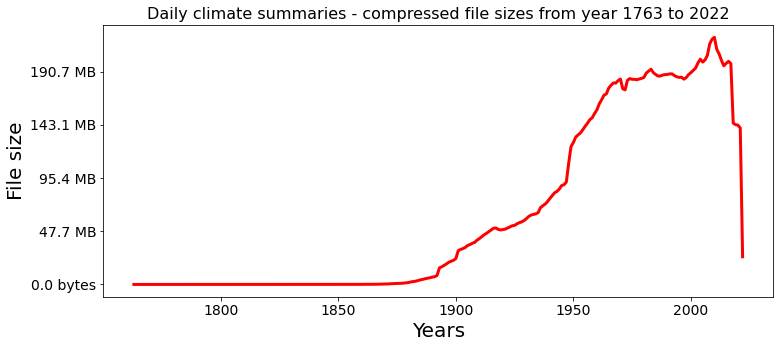

In [2]:
import matplotlib.ticker as tkr  


filesize_df = pd.read_csv('filesize.csv')
def sizeof_fmt(x, pos):
    if x<0:
        return ""
    for x_unit in ['bytes','KB', 'MB', 'GB']:
        if x < 1024.0:
            return "%3.1f %s" % (x, x_unit)
        x /= 1024.0

fig2, ax = plt.subplots(figsize=(12, 5))
ax.plot(filesize_df['Year'], filesize_df['Size'],color='red', linewidth=3)
ax.yaxis.set_major_formatter(tkr.FuncFormatter(sizeof_fmt))
ax.tick_params(axis='both', which='both', labelsize=14)
plt.xlabel('Years', size = 20)
plt.ylabel('File size', size = 20)
plt.title('Daily climate summaries - compressed file sizes from year 1763 to 2022', size = 16)
plt.show()
fig2.savefig("FileSize.png")